In [2]:
# Imports
library("ggplot2")
library("tidyr")
library("dplyr")
library("tidyverse")

In [3]:
#Parameters
set.seed(2015)
location <- -0.6
scale <- 1.2
n <- 190
sample_cauchy <- rcauchy(n, location, scale)

In [4]:
# ordem crescente
sample_cauchy <- sort(sample_cauchy)

# quantis de probabilidade para a distribuição de Cauchy e para a distribuição normal
probabilities <- (1:n) / (n + 1)
quantiles_cauchy <- qcauchy(probabilities, location, scale)
quantiles_normal <- qnorm(probabilities, mean = 0.8, sd = sqrt(2.8))

In [5]:
# criação do dataframe
data <- data.frame(
  sample_cauchy = sample_cauchy,
  quantiles_cauchy = quantiles_cauchy,
  quantiles_normal = quantiles_normal
)


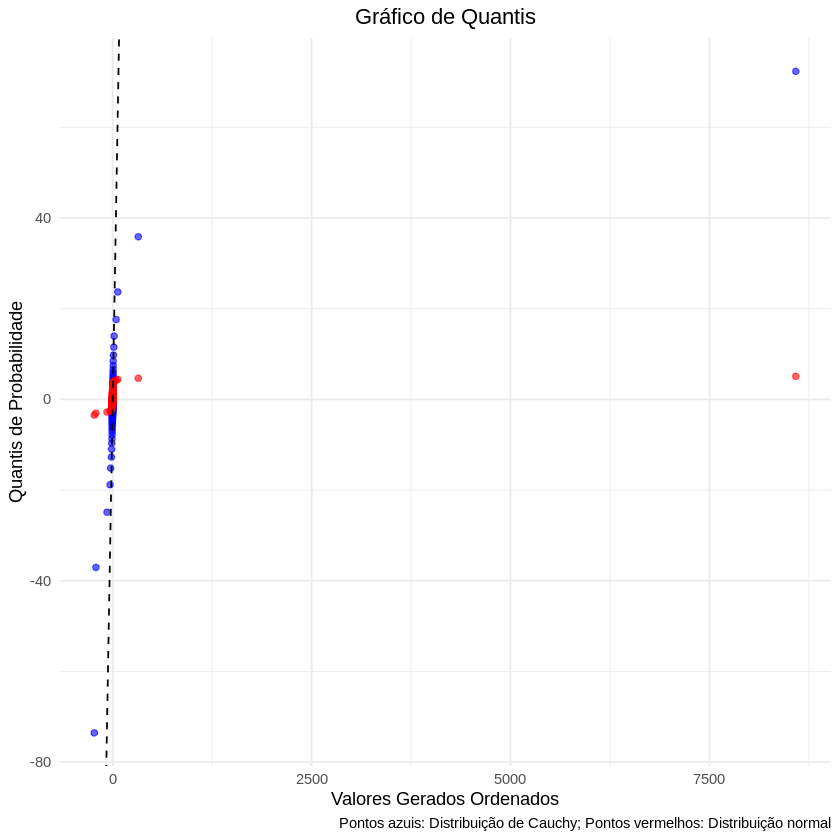

In [9]:
# plot 
ggplot(data) +
  geom_point(aes(x = sample_cauchy, y = quantiles_cauchy), color = "blue", alpha = 0.6) +
  geom_point(aes(x = sample_cauchy, y = quantiles_normal), color = "red", alpha = 0.6) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed") +
  labs(
    title = "Gráfico de Quantis",
    x = "Valores Gerados Ordenados",
    y = "Quantis de Probabilidade",
    caption = "Pontos azuis: Distribuição de Cauchy; Pontos vermelhos: Distribuição normal"
  ) +
  theme_minimal() +
  scale_x_continuous(name = "Valores Gerados Ordenados") +
  scale_y_continuous(name = "Quantis de Probabilidade") +
  theme(plot.title = element_text(hjust = 0.5))

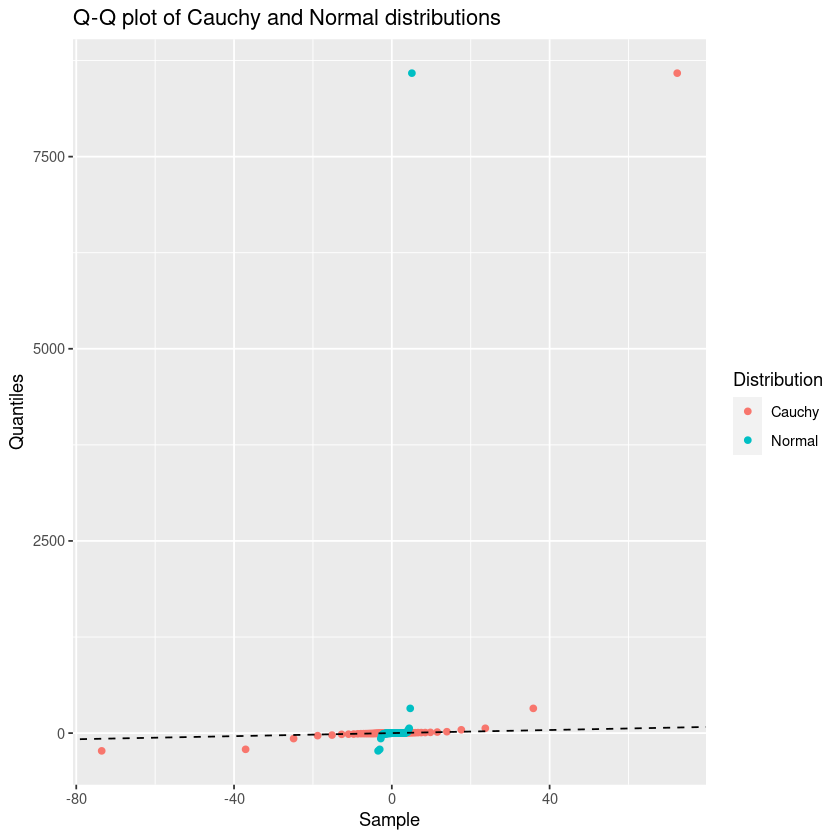

In [1]:
# Carregar a biblioteca
library(ggplot2)

# Definir a semente para reprodutibilidade
set.seed(2015)

# Gerar uma amostra de tamanho 190 com distribuição de Cauchy
loc <- -0.6
scale <- 1.2
sample_cauchy <- rcauchy(190, loc, scale)

# Ordenar a amostra
sample_sorted <- sort(sample_cauchy)

# Calcular os quantis de probabilidade para a amostra Cauchy e para uma normal
prob <- (1:190) / (190 + 1)
quantiles_cauchy <- qcauchy(prob, loc, scale)
quantiles_norm <- qnorm(prob, mean = 0.8, sd = sqrt(2.8))

# Criar um dataframe para plotar
df <- data.frame(
  Sample = rep(sample_sorted, 2),
  Quantiles = c(quantiles_cauchy, quantiles_norm),
  Distribution = rep(c("Cauchy", "Normal"), each = 190)
)

# Plotar usando ggplot2
ggplot(df, aes(x = Sample, y = Quantiles, color = Distribution)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed") + # Retângulo bissectriz
  scale_color_discrete(name = "Distribution") +
  xlab("Sample") +
  ylab("Quantiles") +
  ggtitle("Q-Q plot of Cauchy and Normal distributions")